<a href="https://colab.research.google.com/github/BeritKO/codelabs/blob/main/Copy_of_Bootcamp_2026_Session_5_Data_probing_and_visualisation_Practical_(HP).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data probing and visualization practical**

---
Here we explore a publicly available tabular dataset using the methods defined in the "Data probing and visualization" presentation at the MUST Deep Learning Bootcamp 2026 event.

---
# 1 Housekeeping
---

Here we:

*   Import the necessary libraries
*   Clone a public GitHub repo containing the dataset
*   Load the dataset into a pandas dataframe (df)

In [ ]:
# Dataset credit: Ben Harris
# https://github.com/Ben-C-Harris/AutoTrader-Web-Scrapping-Used-Car-Database/tree/master
# Custom changes to the dataset for this practical

# import the libraries we will be using
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# make matplolib function in "darkmode" like a sane person
plt.style.use("dark_background")

url = 'https://drive.google.com/uc?export=download&id=1cSFa_NVNob9FCM7D83gBVtKLXPBXeBA3'

auto_df = pd.read_csv(url)

> **First we have a look at the raw pandas dataframe.**

In [ ]:
auto_df

# auto_df.head() #Displays the first 5 rows of the dataframe

> **Next check the datatypes of each column**

In [ ]:
auto_df.info()

---
# 2 Cleaning
---




>  **Here we check if there are any obvious missing values or duplicate datapoints.**

In [ ]:
print('Are there any NaNs?')
print(auto_df.isnull().values.any())
print('Are there any duplicates?')
print(auto_df.duplicated().any())

> **First, make a copy of the dataframe should something go wrong**

In [ ]:
#Copy of the clean dataframe
df_with_missing = auto_df.copy()

> **Next, remove the duplicates**

In [ ]:
print(f'Number of rows before removal: {len(auto_df)}')
auto_df = auto_df.drop_duplicates()

print(f'Number of rows after removal: {len(auto_df)}')
print('Are there any NaNs?')
print(auto_df.isnull().values.any())
print('Are there any duplicates?')
print(auto_df.duplicated().any())

> **Lastly, fill the missing values**

In [ ]:
# what number of neighbours should be considered for imputation?
n_neighbours = 3
# ------------------------------------------------------------------------------

# import the K-nearest neighbour imputer from sklearn
from sklearn.impute import KNNImputer

# generate the appropriate indices to replace
num_rows = len(auto_df)

# create a numpy array of the numerical features to impute
to_impute = auto_df.loc[:, ['Price', 'Year', 'Miles', 'BHP', 'L']].to_numpy()

# initialize the imputer, apply it, and store the resulting filled values
imputer = KNNImputer(n_neighbors=n_neighbours)
to_impute = imputer.fit_transform(to_impute)
to_impute = to_impute.round(1)

# place the newly imputed block of values back into the dataframe
auto_df.loc[:, ['Price', 'Year', 'Miles', 'BHP', 'L']] = to_impute

print(f'Number of rows: {len(auto_df)}')
print('Are there any NaNs?')
print(auto_df.isnull().values.any())
print('Are there any duplicates?')
print(auto_df.duplicated().any())

---
# 3 Probing and visualization
---


> **Let's look at how many examples of each category there are.**

In [ ]:
#-------------------------------------------------------------------------------
# select a categorical feature from ['Make', 'Model', 'Name', 'Trans', 'Fuel']
f = 'Make'
#-------------------------------------------------------------------------------

# count the number of examples that belongs to each category of the selected feature
counts = auto_df.groupby([f]).size().reset_index(name='Count')
# sort in descending order
counts = counts.sort_values(by=['Count'])
print(counts)

# initialize the plot
fig, ax = plt.subplots(figsize=(8, 2 + len(counts)/5))

# make a hortizontal bar graph of the category counts
bars = ax.barh(y=counts[f], width=counts.Count, color='purple')
ax.bar_label(bars)
plt.title(f + ' - ' + str(len(counts)) + ' categories')
plt.xlabel('Occurrences')
plt.show()
plt.close()


> **Next we look at the value ranges of some numerical features**

In [ ]:
#-------------------------------------------------------------------------------
# select a numerical feature from ['Price', 'Year', 'Miles', 'BHP', 'L']
f = 'BHP'
# what scales do you want to plot the horizontal and vertical axes on?
# 'linear' or 'log'
x_scale = 'linear'
y_scale = 'linear'
#-------------------------------------------------------------------------------

# initialize the plot
fig, ax = plt.subplots(figsize=(8, 4))
# plot a histogram of the observed values of the current numerical feature
ax.hist(auto_df[f], bins=100)
ax.set_xlabel(f)
ax.set_ylabel('Occurances')
ax.set_xscale(x_scale)
ax.set_yscale(y_scale)
plt.show()
plt.close()


> **Next we see if some of the features have strong correlations.**

In [ ]:
#-------------------------------------------------------------------------------
# select two numerical feature from ['Price', 'Year', 'Miles', 'BHP', 'L']
x_feature = 'BHP'
y_feature = 'L'
# x_feature = 'Price'
# y_feature = 'L'
# what scales do you want to plot the horizontal and vertical axes on?
# 'linear' or 'log'
x_scale = 'linear'
y_scale = 'linear'
# do you want to limit the datapoints to a particular category?
# make the value None if no condition is desired.
# example: categorical_condition = ('Trans', 'Manual')
categorical_condition = None
#-------------------------------------------------------------------------------

# import a linear regression model class from sklearn
from sklearn.linear_model import LinearRegression

# initialize the image with a specific size
fig = plt.figure(figsize=(8, 8))

# get x and y values for points in 2D scatterplot
if categorical_condition is None:
  x = auto_df.loc[:, x_feature]
  y = auto_df.loc[:, y_feature]
else:
  x = auto_df.loc[auto_df[categorical_condition[0]] == categorical_condition[1], x_feature]
  y = auto_df.loc[auto_df[categorical_condition[0]] == categorical_condition[1], y_feature]

# fit a linear regression model on the 2D data and store score
x_array = np.expand_dims(x.to_numpy(), axis=1)
y_array = np.expand_dims(y.to_numpy(), axis=1)
reg = LinearRegression().fit(x_array, y_array)
score = reg.score(x_array, y_array)

# draw scatter plot, add bells-and-whistles, and show
plt.scatter(x=x, y=y, color='purple', alpha=0.5)
plt.grid(alpha=0.5)
plt.xscale(x_scale)
plt.yscale(y_scale)
plt.xlabel(x_feature)
plt.ylabel(y_feature)
ax = plt.gca()
ax.set_axisbelow(True)
plt.tight_layout()

# draw a line represenging the linear regression model's best best fit
line = np.expand_dims(np.arange(x_array.min(), x_array.max(),
 (x_array.max() - x_array.min())/100), axis=1)
plt.plot(line, reg.predict(line), linestyle='--')
plt.title(score)

# show plot
plt.show()
plt.close()


> **Question 1: Visualize the minimum, mean, and maximum of car prices as a function of the year in which it was manufactured.**

In [ ]:
# HINTS
# years = sorted(df['Year'].unique())

# ...
# ...
  # prices_in_year = df.loc[df['Year'] == y].loc[:, 'Price']
# ...
# ...
# ...
# ...
# ...

# plt.plot(years, curve_data[:, 1])
# plt.fill_between(x=years, y1={min_price}, y2={max_price}, alpha=0.5)
# ...
# ...
# ...
# ...

> **Question 2: Remove outliers from price**

We define outliers as those with a price:
* larger than Q3 + 1.5 * IQR, or
* smaller than Q1 - 1.5 * IQR

After removing the outliers, plot the distribution of prices before and after removal.

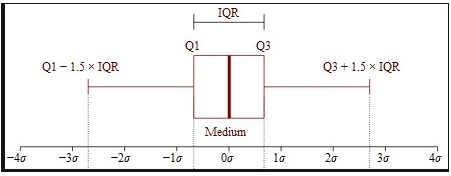

In [ ]:
# prices = auto_df['Price'].to_numpy()
# q# = np.quantile(...)
# ...
# ...
# upper_threshold = ...
# lower_threshold = ...

# auto_df = auto_df[auto_df.loc[:, 'Price'] ... ]
# ...

# new_prices = auto_df['Price'].to_numpy()

# (n, bins, patches) = plt.hist(prices, bins=100, label='before')
# plt.hist(new_prices, bins=bins, label='after')
# ...
# ...
# ...
# ...
# ...
# ...

> **View the mean prices again**

In [ ]:
years = sorted(auto_df['Year'].unique())

curve_data = []
for y in years:
  prices_in_year = auto_df.loc[auto_df['Year'] == y].loc[:, 'Price']
  min_price = prices_in_year.min()
  mean_price = prices_in_year.mean()
  max_price = prices_in_year.max()
  curve_data.append([min_price, mean_price, max_price])
curve_data = np.array(curve_data)

plt.plot(years, curve_data[:, 1])
plt.fill_between(x=years, y1=curve_data[:, 0],
                 y2=curve_data[:, 2], alpha=0.5)
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()
plt.close()

---
# 4 Balancing
---

> **Add generated samples to the dataset**

In [ ]:
# Install dependencies
!pip install sdv
from sdv.metadata import SingleTableMetadata
from sdv.cag import FixedCombinations
from sdv.single_table import GaussianCopulaSynthesizer

In [ ]:
# ------------------------------------------------------------------------------
f = 'Make'
thres = 100
num_samples = 10000
# ------------------------------------------------------------------------------

# Count the number of examples that belongs to each category of the selected feature
counts = auto_df[f].value_counts()

# Select those under the threshold
under_rep_class = counts[counts < thres].index.to_list()
sub_auto_df = auto_df.loc[auto_df[f].isin(under_rep_class)]

# Initialize Metadata
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data=auto_df)
# Define numerical data as categorical to keep them stable
metadata.update_columns(
    column_names=['L', 'BHP'],
    sdtype='categorical')

# Define the constraint for Make, Mode, etc.
make_model_constraint = FixedCombinations(
    column_names=['Make', 'Model', 'Name', 'Trans', 'Fuel', 'BHP', 'L']
)

# Initialize the synthesizer with the constraint
synthesizer = GaussianCopulaSynthesizer(
    metadata=metadata,
    default_distribution='norm'
)
synthesizer.add_constraints(constraints=[make_model_constraint])

# Fit and Sample
synthesizer.fit(sub_auto_df)
synth_data_df = synthesizer.sample(num_rows=num_samples)

synth_data_concat = pd.concat([synth_data_df, auto_df], ignore_index=True)
synth_data_concat

In [ ]:
#-------------------------------------------------------------------------------
# select a categorical feature from ['Make', 'Model', 'Name', 'Trans', 'Fuel']
f = 'Make'
#-------------------------------------------------------------------------------

# count the number of examples that belongs to each category of the selected feature
counts = synth_data_concat.groupby([f]).size().reset_index(name='Count')
# sort in descending order
counts = counts.sort_values(by=['Count'])
print(counts)

# initialize the plot
fig, ax = plt.subplots(figsize=(8, 2 + len(counts)/5))

# make a hortizontal bar graph of the category counts
bars = ax.barh(y=counts[f], width=counts.Count, color='purple')
ax.bar_label(bars)
plt.title(f + ' - ' + str(len(counts)) + ' categories')
plt.xlabel('Occurrences')
plt.show()
plt.close()

---
# 5 Splitting
---

Here we define a development and an evaluation set.

We do this by first one-hot encoding the categorical features, shuffling the dataframe rows, and then partitioning off a block in order to define a developoment set (dev_df) and evaluation set (eval_set).


In [ ]:
# ------------------------------------------------------------------------------
# what features do you want to include in your dataset?
features_in_dataset_orig = ['Make', 'Trans', 'Fuel', 'Year', 'Miles', 'BHP', 'L', 'Price']
cat_features = ['Make', 'Trans', 'Fuel']
# what percentage should be held out as an evaluation set?
percentage_for_eval = 20
# ------------------------------------------------------------------------------

# one hot encode categorical features and construct full dataset
df_full = auto_df.loc[:, features_in_dataset_orig]
df_full = pd.get_dummies(df_full, columns=cat_features, dtype=float)
features_in_dataset = list(df_full.columns)

# shuffle the dataframe
df_full = df_full.sample(frac=1).reset_index(drop=True)

# select development and eval indices
num_rows = len(df_full)
number_of_eval_points = int(num_rows * percentage_for_eval/100)
sample_index = np.arange(0, num_rows)
eval_index = sample_index[:number_of_eval_points]
dev_index = sample_index[number_of_eval_points:]

# sample development and eval sets
eval_df = df_full.loc[eval_index, features_in_dataset]
dev_df = df_full.loc[dev_index, features_in_dataset]

is_normalized = False

dev_df

> **One hot encode and add the synthetic data to the dev dataset**

In [ ]:
# one hot encode categorical features and construct full dataset
synth_df_full = synth_data_df.loc[:, features_in_dataset_orig]
synth_df_full = pd.get_dummies(synth_df_full, columns=cat_features, dtype=float)
synth_df_full = synth_df_full.reindex(columns=dev_df.columns, fill_value=0.0)
# Add Synth data to the dev_data
synth_df_full = pd.concat([dev_df, synth_df_full])

# shuffle the dataframe
synth_df_full = synth_df_full.sample(frac=1).reset_index(drop=True)

synth_df_full


---
# 6 Normalizing
---

Here we normalize the data splits by subtracting the mean and dividing by the standard deviation of the development set.

This results in features that have a mean of zero and unit variance.


In [ ]:
if not is_normalized:

  relevant_features = ['Year', 'Miles', 'BHP', 'L', 'Price']

  # get the per-feature mean of the development set
  dev_mean = dev_df.loc[:, relevant_features].mean()
  # get the per-feature standard deviation of the development set
  dev_std = dev_df.loc[:, relevant_features].std()
  # define a small value for numerical stability
  epsilon = 0.000001

  # normalize the splits
  # normalized value = (value - mean_value) / std_value
  dev_df.loc[:, relevant_features] = (dev_df.loc[:, relevant_features] - dev_mean) / (dev_std + epsilon)
  eval_df.loc[:, relevant_features] = (eval_df.loc[:, relevant_features] - dev_mean) / (dev_std + epsilon)

  is_normalized = True
else:
  print('Already normalized. Skipping normalization.')

# in order to reverse the normalization, do the following
# dev_df = dev_mean + dev_df * (dev_std + epsilon)

dev_df


---
# 7 Build Least Squares Model
---

Here we train a simple linear regression model on the development set, evaluate it on the evaluation set, and visualize it's performance with a scatter plot.

In [ ]:
# ------------------------------------------------------------------------------
# Do you want to reset Prices to the native range begfore evaluating?
do_renormalize = True
# ------------------------------------------------------------------------------

# import a linear regression model class from sklearn
# https://scikit-learn.org/1.6/modules/generated/sklearn.linear_model.LinearRegression.html
from sklearn.linear_model import LinearRegression

# define input and output features
# the output is price, and the rest is the input
input_features = list(dev_df.columns)
input_features.remove('Price')
output_features = ['Price']

# fit a linear regression model on the development set, saving its outputs
dev_x_array = dev_df.loc[:, input_features].to_numpy()
dev_y_array = dev_df.loc[:, output_features].to_numpy()
reg = LinearRegression().fit(dev_x_array, dev_y_array)
dev_output = reg.predict(dev_x_array)

# get output values of the fitted model on the evaluation set
eval_x_array = eval_df.loc[:, input_features].to_numpy()
eval_y_array = eval_df.loc[:, output_features].to_numpy()
eval_output = reg.predict(eval_x_array)

# if the data was normalized, reverse it for the mse calculation
if is_normalized and do_renormalize:
  dev_output = dev_mean['Price'] + dev_output * (dev_std['Price'] + epsilon)
  dev_y_array = dev_mean['Price'] + dev_y_array * (dev_std['Price'] + epsilon)
  eval_output = dev_mean['Price'] + eval_output * (dev_std['Price'] + epsilon)
  eval_y_array = dev_mean['Price'] + eval_y_array * (dev_std['Price'] + epsilon)

# calculate the meen squared errors
dev_mse = ((dev_y_array - dev_output) *  (dev_y_array - dev_output)).mean()
eval_mse = ((eval_y_array - eval_output) *  (eval_y_array - eval_output)).mean()

# compare the model outputs with ground truths on a scatter plot
plt.scatter(dev_output, dev_y_array, label='dev_set ' + str(dev_mse))
plt.scatter(eval_output, eval_y_array, label='eval_set ' + str(eval_mse))
plt.axline((0, 0), slope=1, linestyle='--')
plt.xlabel('Model output price')
plt.ylabel('Real output price')
plt.legend()
plt.show()
plt.close()


---
# 8 Build DL model
---

Here we train a simple DL regression model on the development set, evaluate it on the evaluation set, and visualize it's performance with a scatter plot.

In [ ]:
# ------------------------------------------------------------------------------
# For how many epochs should the model be trained?
number_of_epochs = 20
# What should the size of the mini-batches be?
minibatch_size = 32
# Do you want to reset Prices to the native range begfore evaluating?
do_renormalize = True
# ------------------------------------------------------------------------------

# import a MLP regression model class from sklearn
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html
from sklearn.neural_network import MLPRegressor

# define input and output features
# the output is price, and the rest is the input
input_features = list(dev_df.columns)
input_features.remove('Price')
output_features = ['Price']

# fit a linear regression model on the development set, saving its outputs
dev_x_array = dev_df.loc[:, input_features].to_numpy()
dev_y_array = dev_df.loc[:, output_features].to_numpy().squeeze()
dl_reg = MLPRegressor(max_iter=number_of_epochs,
                   batch_size=minibatch_size).fit(dev_x_array, dev_y_array)
dev_output = dl_reg.predict(dev_x_array)

# get output values of the fitted model on the evaluation set
eval_x_array = eval_df.loc[:, input_features].to_numpy()
eval_y_array = eval_df.loc[:, output_features].to_numpy().squeeze()
eval_output = dl_reg.predict(eval_x_array)

# if the data was normalized, reverse it for the mse calculation
if is_normalized and do_renormalize:
  dev_output = dev_mean['Price'] + dev_output * (dev_std['Price'] + epsilon)
  dev_y_array = dev_mean['Price'] + dev_y_array * (dev_std['Price'] + epsilon)
  eval_output = dev_mean['Price'] + eval_output * (dev_std['Price'] + epsilon)
  eval_y_array = dev_mean['Price'] + eval_y_array * (dev_std['Price'] + epsilon)

# calculate the meen squared errors
dev_mse = ((dev_y_array - dev_output) *  (dev_y_array - dev_output)).mean()
eval_mse = ((eval_y_array - eval_output) *  (eval_y_array - eval_output)).mean()

# get the training loss curve
loss_curve = dl_reg.loss_curve_

# compare the model outputs with ground truths on a scatter plot
fig, ax = plt.subplots(1, 2, figsize=(20, 4))
ax[0].scatter(dev_output, dev_y_array, label='dev_set ' + str(dev_mse))
ax[0].scatter(eval_output, eval_y_array, label='eval_set ' + str(eval_mse))
ax[0].axline((0, 0), slope=1, linestyle='--')
ax[0].set_xlabel('Model output price')
ax[0].set_ylabel('Real output price')
ax[0].legend()

# also plot the training loss curve
ax[1].plot(loss_curve, label='train_loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Train Loss')

plt.show()
plt.close()

Q4: Make a scatter plot where the predicted price (from the DL model) is on the vertical axis and the miles are on the horizontal axis.

In [ ]:
# diesel_cars = eval_df[eval_df['Fuel_Diesel'] == 1.]
# ...

# ...
# ...

# petrol_x_array = petrol_cars.loc[:, input_features].to_numpy()
# petrol_outputs = dl_reg.predict(petrol_x_array)

# ...
# ...

# check to see if you should normalise
# ...
# ...
# ...
# ...
# ...

# plt.scatter(petrol_x, petrol_outputs, label='petrol')
# ...

# ...
# ...
# ...
# ...
# ...

In [ ]:
diesel_cars = eval_df[eval_df['Fuel_Diesel'] == 1.]
petrol_cars = eval_df[eval_df['Fuel_Petrol'] == 1.]

diesel_x_array = diesel_cars.loc[:, input_features].to_numpy()
diesel_outputs = dl_reg.predict(diesel_x_array)

petrol_x_array = petrol_cars.loc[:, input_features].to_numpy()
petrol_outputs = dl_reg.predict(petrol_x_array)

diesel_x = diesel_cars.loc[:, 'Miles']
petrol_x = petrol_cars.loc[:, 'Miles']

if is_normalized and do_renormalize:
  petrol_x = dev_mean['Miles'] + petrol_x * (dev_std['Miles'] + epsilon)
  diesel_x = dev_mean['Miles'] + diesel_x * (dev_std['Miles'] + epsilon)
  petrol_outputs = dev_mean['Price'] + petrol_outputs * (dev_std['Price'] + epsilon)
  diesel_outputs = dev_mean['Price'] + diesel_outputs * (dev_std['Price'] + epsilon)

plt.scatter(petrol_x, petrol_outputs, label='petrol')
plt.scatter(diesel_x, diesel_outputs, label='diesel')

plt.xlabel('Miles')
plt.ylabel('Predicted Price')
plt.legend()
plt.show()
plt.close()